# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
     #Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | omu-aran
Processing Record 7 of Set 1 | phongsali
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | jha-jha
Processing Record 10 of Set 1 | tchintabaraden
Processing Record 11 of Set 1 | dudinka
Processing Record 12 of Set 1 | atbasar
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | kerouane
Processing Record 15 of Set 1 | selfoss
Processing Record 16 of Set 1 | mata-utu
Processing Record 17 of Set 1 | coahuayana de hidalgo
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | saldanha
Processing Record 20 of Set 1 | ancud
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | port-aux-francai

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,7.01,95,100,5.14,GB,1733356947
1,ushuaia,-54.8000,-68.3000,2.81,87,100,5.66,AR,1733356806
2,albany,42.6001,-73.9662,0.25,71,100,2.68,US,1733356840
3,waitangi,-43.9535,-176.5597,17.12,89,93,4.92,NZ,1733356952
4,omu-aran,8.1333,5.1000,20.80,33,7,0.73,NG,1733356953


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,7.01,95,100,5.14,GB,1733356947
1,ushuaia,-54.8000,-68.3000,2.81,87,100,5.66,AR,1733356806
2,albany,42.6001,-73.9662,0.25,71,100,2.68,US,1733356840
3,waitangi,-43.9535,-176.5597,17.12,89,93,4.92,NZ,1733356952
4,omu-aran,8.1333,5.1000,20.80,33,7,0.73,NG,1733356953


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

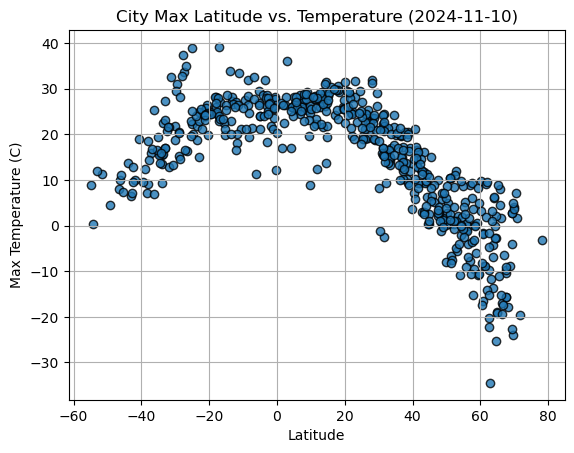

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

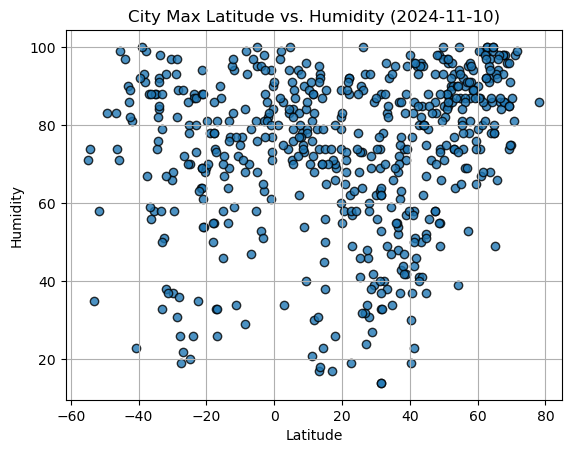

In [10]:
# Build scatter plot for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

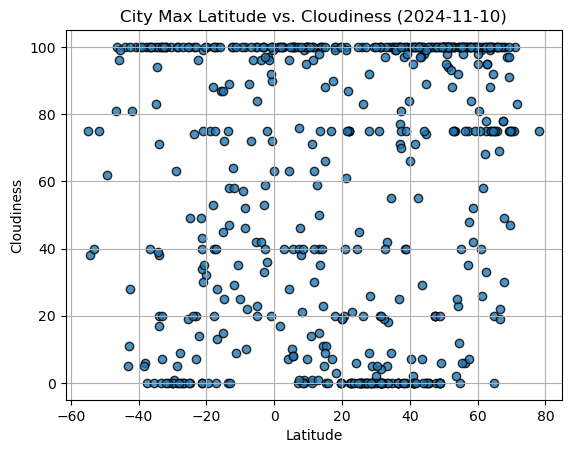

In [11]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

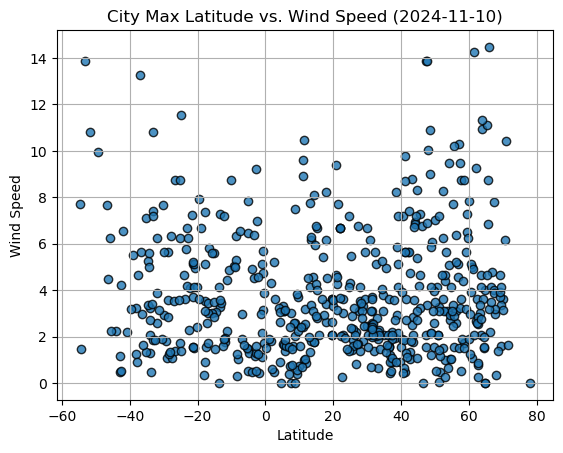

In [12]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create linear regtession plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
    regress_values=x_values*slope+intercept
    line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize= 12,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"latitude vs. {title}")
    print(f"rsquare value is {rvalue**2}")
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,guerrero negro,27.9769,-114.0611,23.59,31,92,1.38,MX,1731266476
4,albany,42.6001,-73.9662,12.23,41,100,1.34,US,1731266540
5,dausa,26.8833,76.3333,23.03,32,0,2.19,IN,1731266598
8,la democracia,14.2308,-90.9472,29.11,70,100,1.75,GT,1731266601
9,klyuchi,52.2667,79.1667,0.26,90,100,8.29,RU,1731266602


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,guerrero negro,27.9769,-114.0611,23.59,31,92,1.38,MX,1731266476
4,albany,42.6001,-73.9662,12.23,41,100,1.34,US,1731266540
5,dausa,26.8833,76.3333,23.03,32,0,2.19,IN,1731266598
8,la democracia,14.2308,-90.9472,29.11,70,100,1.75,GT,1731266601
9,klyuchi,52.2667,79.1667,0.26,90,100,8.29,RU,1731266602


###  Temperature vs. Latitude Linear Regression Plot

rsquare value is 0.7485910406246993


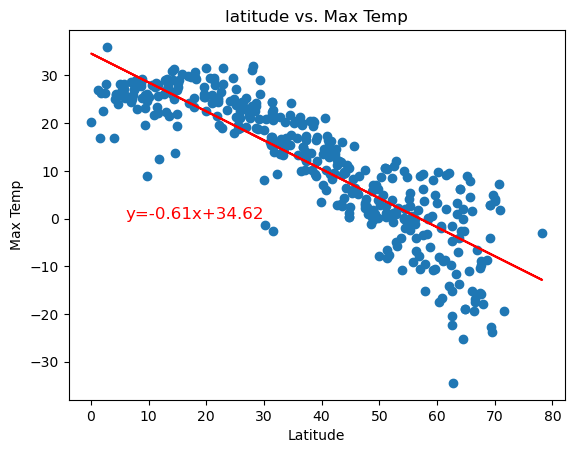

In [18]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Max Temp",(6,0))

rsquare value is 0.7485910406246993


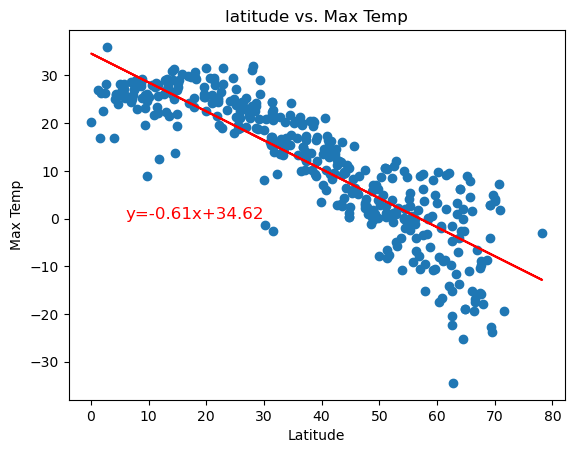

In [19]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Max Temp",(6,0))

**Discussion about the linear relationship:** Strong Positive Correlation

### Humidity vs. Latitude Linear Regression Plot

rsquare value is 0.07572491674848025


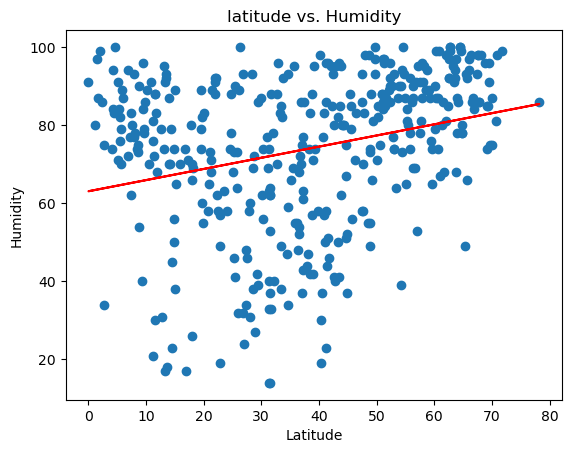

In [20]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,"Humidity",(6,0))

rsquare value is 0.07572491674848025


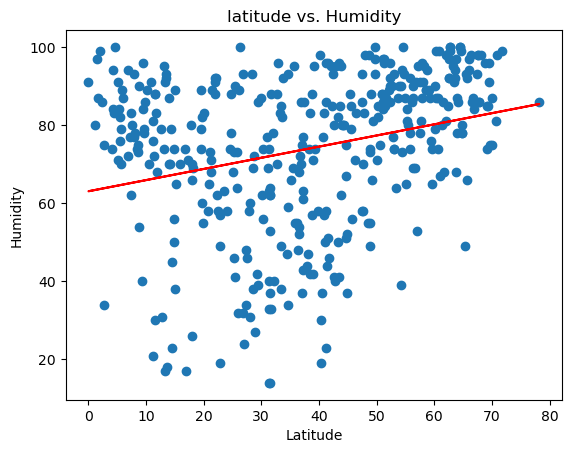

In [21]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,"Humidity",(6,0))

**Discussion about the linear relationship:** No correlation

### Cloudiness vs. Latitude Linear Regression Plot

rsquare value is 0.06826527473338063


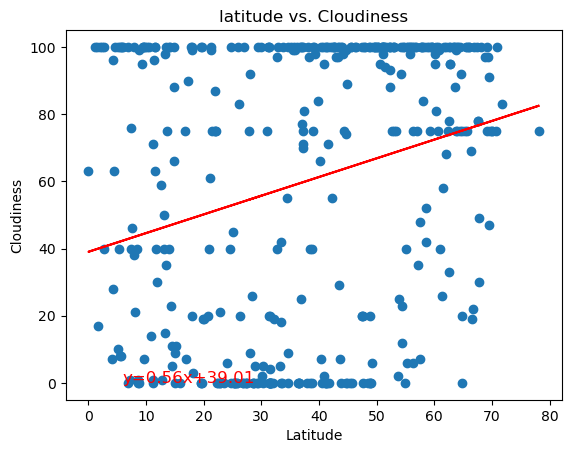

In [22]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,"Cloudiness",(6,0))

rsquare value is 0.06826527473338063


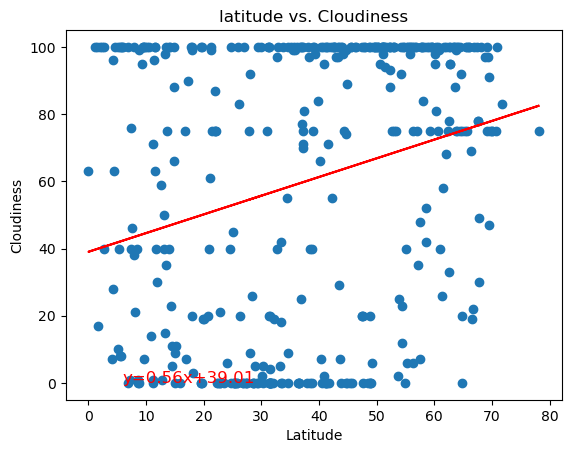

In [23]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,"Cloudiness",(6,0))

**Discussion about the linear relationship:** No correlation

### Wind Speed vs. Latitude Linear Regression Plot

rsquare value is 0.03261525883591533


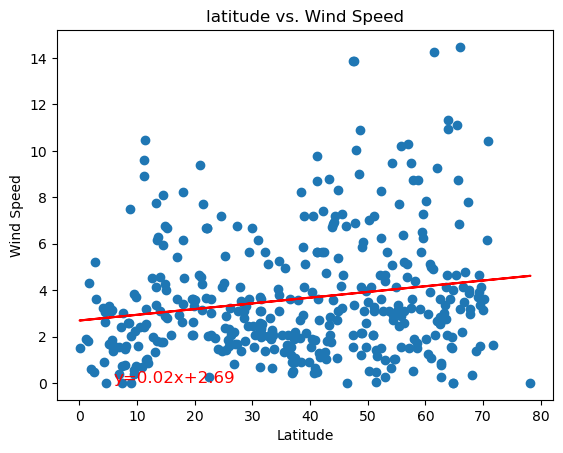

In [26]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Wind Speed",(6,0))

rsquare value is 0.03261525883591533


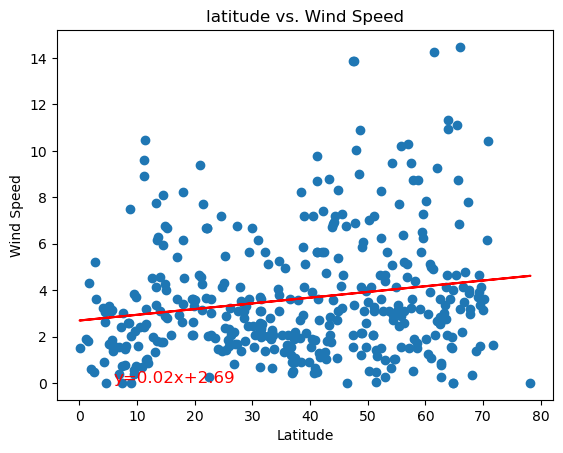

In [25]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Wind Speed",(6,0))

**Discussion about the linear relationship:** No correlation